In [1]:
##Importar librerias a utilizar 
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import minimize
import os
import glob 
import pandas as pd
import re
import math

leyendo los archivos 

In [8]:
import glob
files=glob.glob("./higi/*.txt")

acomodando los archivos por fecha 

In [9]:
files

['./higi/16Jun2020.txt',
 './higi/04Dic2019.txt',
 './higi/11Sep2020.txt',
 './higi/03Nov2019.txt',
 './higi/12Oct2020.txt',
 './higi/09May2020.txt',
 './higi/15Jul2020.txt',
 './higi/05Ene2020.txt',
 './higi/10Ago2020.txt',
 './higi/06Feb2020.txt',
 './higi/13Nov2020.txt',
 './higi/01Sep2019.txt',
 './higi/14Dic2020.txt',
 './higi/07Mar2020.txt',
 './higi/02Oct2019.txt',
 './higi/08Abr2020.txt']

In [10]:
date=[]
date_=[]
files_=[]

for i,file in enumerate(files):
    date.append(re.findall(r'\d+',file)[0])


temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],files[i])
    files_.append(files[i])

01 ./higi/01Sep2019.txt
02 ./higi/02Oct2019.txt
03 ./higi/03Nov2019.txt
04 ./higi/04Dic2019.txt
05 ./higi/05Ene2020.txt
06 ./higi/06Feb2020.txt
07 ./higi/07Mar2020.txt
08 ./higi/08Abr2020.txt
09 ./higi/09May2020.txt
10 ./higi/10Ago2020.txt
11 ./higi/11Sep2020.txt
12 ./higi/12Oct2020.txt
13 ./higi/13Nov2020.txt
14 ./higi/14Dic2020.txt
15 ./higi/15Jul2020.txt
16 ./higi/16Jun2020.txt


In [11]:
for i,file in enumerate(files_):
    data=pd.read_csv(file)
    data=data[1:]
    data=data[data['ENTIDAD']==11][1:]
    mpo=data.groupby(['MUNICIPIO']).sum()
    if i==0 :
        if 'LISTA_NAL' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA_NAL'])
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA_NACIONAL'])
        if 'LISTA' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA'])
    else:
        if 'LISTA_NAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NAL']
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NACIONAL']
        if 'LISTA' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA']

/home/rogelio/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


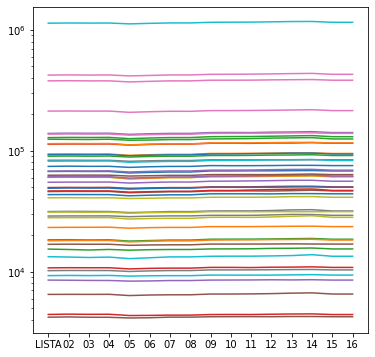

In [12]:
plt.figure(figsize=(6,6))

for i in range(46):
    plt.plot(df_mpo.iloc[i])
    plt.yscale('log')

sumas por municipio 

In [17]:
df_mpo.head()

,LISTA,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
MUNICIPIO,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,66736.0,68057,68093,68244,68241,68422,68611,68052,68054
2,94040,94139,93825,93970,91712,92759,93343,93340.0,94967,95009,95209,95595,96005,95934,94952,94967
3,128446,128937,128731,128978,125884,127461,128544,128543.0,130720,130992,131172,131903,132669,133489,130708,130717
4,49656,49787,49699,49818,48907,49311,49596,49596.0,50283,50287,50324,50647,50867,50877,50273,50281
5,67868,68120,67992,68218,66789,67553,68063,68058.0,69125,69132,69287,69745,70072,70194,69114,69124


In [18]:
municipios=np.asarray(df_mpo)

In [19]:
municipios[0][:-1]

array([67427., 67541., 67450., 67463., 65505., 66245., 66750., 66736.,
       68057., 68093., 68244., 68241., 68422., 68611., 68052.])

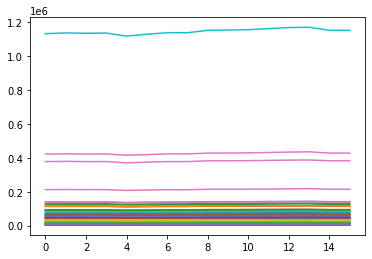

In [20]:
for i in range(46):
    plt.plot(municipios[i])

prediccion 

In [21]:
fits=[]
prediction_lnal=[]

for i in range(len(municipios)):
    xx=np.arange(len(municipios[i]))
    ma, ba = np. polyfit(xx, municipios[i],1,w=municipios[i])
    fits.append([ma,ba])
    pred=ma*(xx[-12]+12)+ba
    #if pred < municipios[i][-1]:
    #    pred=municipios[i][-1]

    prediction_lnal.append(pred)

In [22]:
fits

[[104.8329133420266, 66782.92531023288],
 [164.2197769425049, 93144.4950195344],
 [313.80763972567087, 127540.7111498222],
 [85.5177289179055, 49377.05656540007],
 [156.57283268465844, 67488.99750919905],
 [4.763792228252707, 4187.748788951087],
 [682.4308416974424, 375668.9933458013],
 [63.92378670864526, 31195.594819463517],
 [114.63183746883539, 59734.22675912885],
 [10.499973269635822, 9254.734618125869],
 [125.7772403675854, 73827.73436499469],
 [41.01553237971641, 23120.96735872133],
 [34.13448488655952, 18184.151050239925],
 [227.4640051069944, 112774.06939073114],
 [294.3198407960302, 138254.28658497258],
 [12.684769200091582, 16749.780617338478],
 [862.8829049758236, 419861.3165978523],
 [53.5208808312083, 28725.023659383038],
 [63.67867739478067, 40584.45651209907],
 [2488.1765854238556, 1128636.71465027],
 [79.853243487213, 43044.89959104409],
 [32.89029878594017, 17930.583975395148],
 [237.59030928717712, 123241.99682164528],
 [13.428320661144292, 10697.798659188762],
 [140

In [23]:
df_mpo['Prediction LNAL']=prediction_lnal

In [24]:
df_mpo.head()

,LISTA,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,Prediction LNAL
MUNICIPIO,,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,66736.0,68057,68093,68244,68241,68422,68611,68052,68054,68460.251924
2,94040,94139,93825,93970,91712,92759,93343,93340.0,94967,95009,95209,95595,96005,95934,94952,94967,95772.011451
3,128446,128937,128731,128978,125884,127461,128544,128543.0,130720,130992,131172,131903,132669,133489,130708,130717,132561.633385
4,49656,49787,49699,49818,48907,49311,49596,49596.0,50283,50287,50324,50647,50867,50877,50273,50281,50745.340228
5,67868,68120,67992,68218,66789,67553,68063,68058.0,69125,69132,69287,69745,70072,70194,69114,69124,69994.162832


In [25]:
prediccion=df_mpo['Prediction LNAL']
prediccion.sum()
prediccion.sum()/750

6026.9162228728

predicción por secciones 

In [26]:
for i,file in enumerate(files_):
    data=pd.read_csv(file)
    data=data[1:]
    data=data[data['ENTIDAD']==11][1:]
    mpo=data.groupby(['SECCION']).sum()
    if i==0 :
        if 'LISTA_NAL' in mpo.columns:
            df_SEC = pd.DataFrame(mpo['LISTA_NAL'])
        if 'LISTA_NACIONAL' in mpo.columns:
            df_SEC = pd.DataFrame(mpo['LISTA_NACIONAL'])
        if 'LISTA' in mpo.columns:
            df_SEC = pd.DataFrame(mpo['LISTA'])
    else:
        if 'LISTA_NAL' in mpo.columns:
            df_SEC[date_[i]]=mpo['LISTA_NAL']
        if 'LISTA_NACIONAL' in mpo.columns:
            df_SEC[date_[i]]=mpo['LISTA_NACIONAL']
        if 'LISTA' in mpo.columns:
            df_SEC[date_[i]]=mpo['LISTA']

/home/rogelio/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


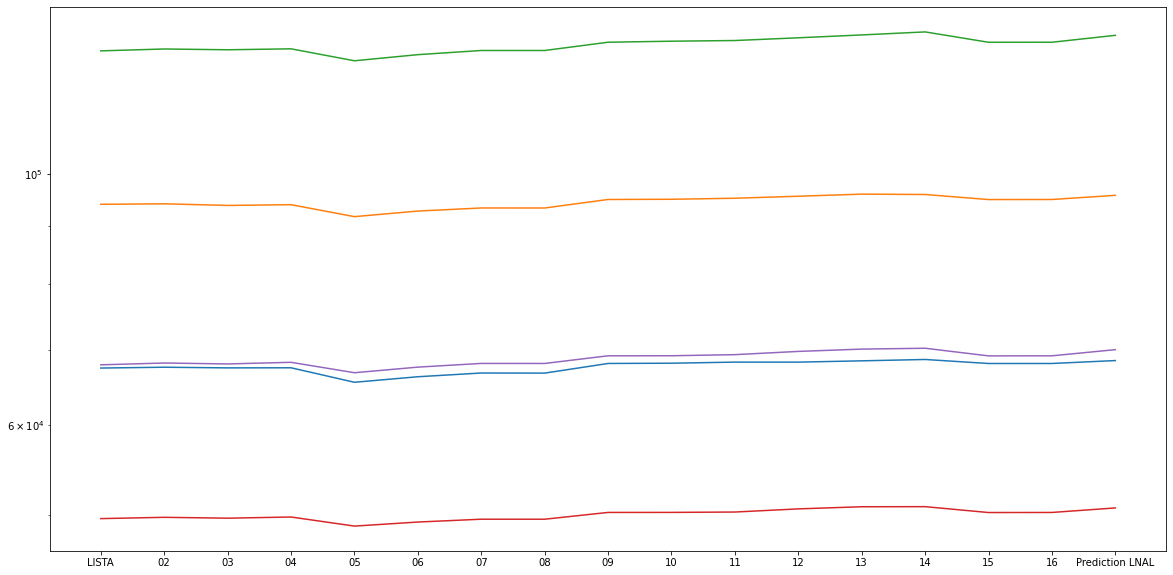

In [27]:
plt.figure(figsize=(20,10))

for i in range(5):
    plt.plot(df_mpo.iloc[i])
    plt.yscale('log')

In [28]:
print(df_SEC)

         LISTA    02    03    04    05    06    07      08    09      10  \
SECCION                                                                    
1         1539  1545  1539  1538  1493  1515  1527  1527.0  1552  1557.0   
2         1998  2008  2004  2005  1939  1963  1977  1977.0  2026  2024.0   
3         1522  1522  1525  1520  1457  1477  1493  1493.0  1531  1529.0   
4          945   949   949   952   915   932   938   938.0   957   959.0   
5         1067  1065  1065  1064  1026  1036  1047  1045.0  1072  1071.0   
...        ...   ...   ...   ...   ...   ...   ...     ...   ...     ...   
3150      1556  1560  1578  1582  1588  1601  1615  1615.0  1616  1618.0   
3151      1336  1343  1336  1336  1329  1343  1352  1352.0  1365  1363.0   
3152      1074  1080  1085  1086  1080  1094  1095  1095.0  1107  1110.0   
3153      1289  1295  1294  1302  1301  1313  1328  1328.0  1328  1327.0   
3154      2105  2126  2136  2154  2186  2218  2248  2248.0  2248  2257.0   

           

rellenamos con ceros los valores nulos 

In [29]:
df_SEC2=df_SEC.fillna(0)
SECCIONES=np.asarray(df_SEC2)

In [30]:
SECCIONES[0][:-1]

array([1539., 1545., 1539., 1538., 1493., 1515., 1527., 1527., 1552.,
       1557., 1562., 1561., 1565., 1571., 1552.])

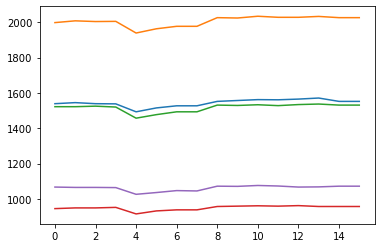

In [31]:
for i in range(5):
    plt.plot(SECCIONES[i])

prediccion 

In [32]:
fits=[]
prediction_SEC=[]

for i in range(len(SECCIONES)):
    xx=np.arange(len(SECCIONES[i]))
    ma, ba = np. polyfit(xx, SECCIONES[i],1,w=SECCIONES[i])
    fits.append([ma,ba])
    pred=ma*(xx[-12]+12)+ba
    #if pred < SECCIONES[i][-1]:
    #    pred=SECCIONES[i][-1]

    prediction_SEC.append(pred)

In [33]:
fits

[[2.4895000776529215, 1525.0971362971716],
 [3.412082346559293, 1980.908648540936],
 [2.0477014334360373, 1501.6335702584795],
 [1.4440978913905411, 938.5860244755912],
 [1.2235520323426265, 1052.7710439103848],
 [5.628104620133211, 2844.6484564212737],
 [2.1467189913394957, 1300.3759150318892],
 [1.3164954286560189, 1352.393858545307],
 [2.402459495846264, 2301.035931970606],
 [2.93310476894458, 1802.8458970650736],
 [5.978140795904229, 3440.26741576137],
 [3.4479890905921424, 1302.5443934223745],
 [0.8620824181360043, 741.6794730197245],
 [0.24655082883925108, 320.8432171505063],
 [1.528462976666543, 670.4036461420255],
 [3.691293363316183, 1778.6368328529159],
 [1.0707573000481585, 1357.9413431649589],
 [0.45086538022078193, 862.8293875136957],
 [1.8140739718737873, 1112.3347932481258],
 [1.4176345899644556, 1941.7711336363482],
 [2.724409777000786, 1817.7512712894304],
 [3.6048261747807375, 2213.496235353534],
 [1.4082271263651653, 495.00310372714733],
 [3.3332582789467713, 1792.14

In [34]:
df_SEC2['Prediction SEC']=prediction_SEC

In [35]:
df_SEC2.head()

,LISTA,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,Prediction SEC
SECCION,,,,,,,,,,,,,,,,,
1,1539,1545,1539,1538,1493,1515,1527,1527.0,1552,1557.0,1562.0,1561.0,1565.0,1571.0,1552.0,1552,1564.929138
2,1998,2008,2004,2005,1939,1963,1977,1977.0,2026,2024.0,2034.0,2028.0,2028.0,2033.0,2026.0,2026,2035.501966
3,1522,1522,1525,1520,1457,1477,1493,1493.0,1531,1529.0,1533.0,1528.0,1534.0,1537.0,1531.0,1531,1534.396793
4,945,949,949,952,915,932,938,938.0,957,959.0,961.0,959.0,962.0,957.0,957.0,957,961.691591
5,1067,1065,1065,1064,1026,1036,1047,1045.0,1072,1071.0,1076.0,1073.0,1067.0,1068.0,1072.0,1072,1072.347876


In [36]:
prediccion=df_SEC2['Prediction SEC']
prediccion.sum()
prediccion.sum()/750

6027.807462514761

In [37]:
predicciones=np.asarray(df_SEC2['Prediction SEC'])
predicciones

array([1564.92913754, 2035.50196609, 1534.39679319, ..., 1123.56377899,
       1356.10716358, 2330.10491999])

In [38]:
pr=[]
for i in range(len(predicciones)):
    a=predicciones[i]/750
    pr.append(a)

print('Número de casillas por sección')
for i in range(len(pr)):
    print(math.ceil(pr[i]))

Número de casillas por sección
3
3
3
2
2
4
2
2
4
3
5
2
2
1
1
3
2
2
2
3
3
4
1
3
2
3
3
1
2
2
3
2
2
3
2
2
2
4
3
2
2
2
1
2
1
2
2
2
1
3
5
2
2
2
1
2
2
3
2
2
2
2
1
2
2
1
4
2
1
2
2
2
2
3
1
2
2
2
3
2
5
2
2
2
2
6
1
1
2
1
2
1
2
2
2
2
2
1
2
2
2
2
2
2
1
2
1
2
2
1
2
1
1
3
3
2
1
2
2
1
2
1
3
1
1
2
1
2
1
1
2
2
1
1
1
3
3
3
1
2
8
2
2
2
9
3
2
2
2
2
1
1
2
2
4
6
7
3
2
2
1
1
1
6
2
1
1
2
2
1
2
5
5
2
4
2
3
1
2
3
1
2
2
2
2
2
1
3
2
3
2
1
1
3
1
1
3
1
1
4
2
3
1
2
2
2
2
2
1
2
2
2
2
3
1
4
1
3
2
2
1
2
2
2
2
2
3
1
2
2
1
1
2
1
2
2
1
2
1
1
1
1
1
2
2
2
3
2
2
2
4
5
1
2
3
3
3
3
2
2
3
2
3
2
2
1
1
1
3
2
2
2
3
1
2
2
1
1
2
2
1
1
2
1
2
2
1
5
4
3
3
5
2
7
3
2
2
1
2
2
2
4
2
3
2
1
3
1
2
2
4
1
2
4
7
2
2
1
3
2
1
3
2
3
2
3
3
3
2
2
1
2
2
1
2
22
3
5
6
3
7
5
18
4
2
3
2
2
2
2
4
2
1
3
5
3
1
2
2
2
4
2
2
1
5
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
1
2
2
2
2
1
1
1
1
2
2
2
2
7
1
1
1
1
2
2
2
2
2
13
2
2
2
2
1
1
1
1
2
2
1
2
2
2
1
1
1
1
2
1
1
2
2
3
2
1
1
1
1
2
2
2
2
2
1
2
3
2
2
2
2
2
2
3
2
2
2
6
1
1
1
1
2
2
2
2
1
1
7
3
7
2
2
3
4
4
3
3
2
4
2
2


In [39]:
total=sum(pr)
math.ceil(total)

6028